<a href="https://colab.research.google.com/github/umid1991/testweb/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 просмотр данных 
                     п»їregion   period        date  disease
0  РђР»С‚Р°Р№СЃРєРёР№ РєСЂР°Р№       1  13.04.2020        2
1  РђР»С‚Р°Р№СЃРєРёР№ РєСЂР°Р№       2  14.04.2020        5
2  РђР»С‚Р°Р№СЃРєРёР№ РєСЂР°Р№       3  15.04.2020        3

 статистика по данным 
           period    disease
count  79.000000  79.000000
mean   40.000000  50.075949
std    22.949219  25.564786
min     1.000000   2.000000
25%    20.500000  28.000000
50%    40.000000  63.000000
75%    59.500000  71.500000
max    79.000000  81.000000


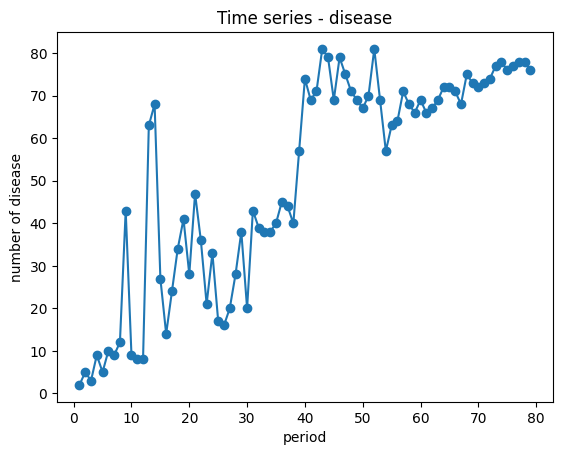

In [ ]:
import pandas as pd
# загрузка данных формата csv
data = pd.read_csv('disease_pract.csv', sep = ';' , encoding='windows-1251')
# добавление номера периода как первого (нумерация столбцов начинается с 0)
# столбца к исходным данным, имя столбца "period"
data.insert(1, "period", [i for i in range(1, len(data)+1)], True)
# просмотр первых строк данных
print(' просмотр данных \n', data.head(3))
# статистика по данным
print('\n статистика по данным \n', data.describe())
# построение графика
from matplotlib import pyplot
pyplot.plot(data['period'], data['disease'], 'o-')
pyplot.title('Time series - disease')
pyplot.xlabel('period')
pyplot.ylabel('number of disease')
pyplot.show()


In [ ]:
koef = data['period'].corr(data['disease'])
print ('коэффициент линейной корреляции между временным периодом и заболеваемостью: %.3f' % koef)

коэффициент линейной корреляции между временным периодом и заболеваемостью: 0.862


<ipython-input-5-3ca34543903c>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('свободный член: %.3f' % model.intercept_)
<ipython-input-5-3ca34543903c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('коэффициент при независимой переменной: %.3f' % model.coef_)


свободный член: 11.685
коэффициент при независимой переменной: 0.960


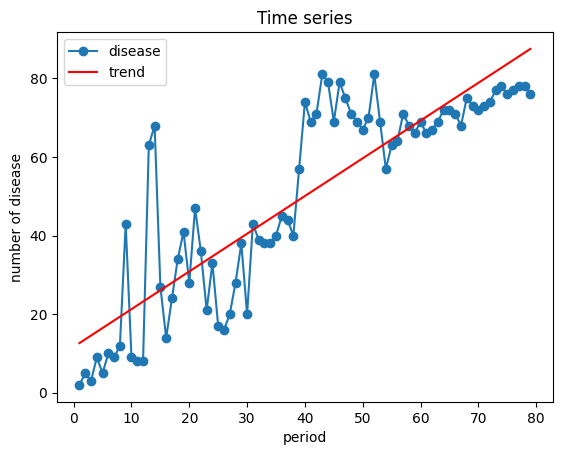

In [ ]:
from sklearn.linear_model import LinearRegression
# выделение независимой переменной
X = data[['period']]
# выделение зависимой переменной
y = data[['disease']]
# создание объекта линейной регрессии
model = LinearRegression()
# обучение модели линейной регрессии
model.fit(X, y)
print('свободный член: %.3f' % model.intercept_)
print('коэффициент при независимой переменной: %.3f' % model.coef_)
# рассчет тренда - прогнозных значений по модели за весь период
trend = model.predict(X)
# построение графика
pyplot.plot(X, y, 'o-', label='disease')
pyplot.plot(X, trend, 'r', label='trend')
pyplot.title('Time series')
pyplot.xlabel('period')
pyplot.ylabel('number of disease')
pyplot.legend()
pyplot.show()


In [ ]:
# коэффициент детерминации
from sklearn.metrics import r2_score
r2 = r2_score(y, trend)
print("коэффициент детерминации R2: %.2f" % r2)

коэффициент детерминации R2: 0.74


In [ ]:
# критерий Фишера
alpha = 0.05
k1 = 1
k2 = len(data)-2
# по таблице значений статистики критерия Фишера получаем
# f-табличное(alpha=0.05, k1=1, k2=43) = 4.06
f_tab = 4.06
f_fact = r2/(1-r2)*(len(data)-2)
print('f_fact=', f_fact, 'f_tab=', f_tab)
# применение критерия Фишера
print('критерий Фишера:')
if f_fact > f_tab:
  print('Гипотеза Н0 отклоняется (найденная линейная зависимость статистически значима)')
else:
  print('Гипотеза Н0 принимается (найденная линейная зависимость статистически не значима)')

f_fact= 308.00000000000006 f_tab= 4.06
критерий Фишера:
Гипотеза Н0 отклоняется (найденная линейная зависимость статистически значима)


In [ ]:
import statsmodels.api as sm
# построение линейной регрессии
X2 = sm.add_constant(X)
est_reg = sm.OLS(y, X2).fit()
print('параметры линейной регрессии: \n', est_reg.summary())
# печать значения p-value
print("\n значение p-value для независимой переменной period: %.10f" %
est_reg.pvalues[1])

параметры линейной регрессии: 
                             OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.22e-24
Time:                        22:45:24   Log-Likelihood:                -314.08
No. Observations:                  79   AIC:                             632.2
Df Residuals:                      77   BIC:                             636.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.684

<ipython-input-10-0fa51455d3c5>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  est_reg.pvalues[1])


In [ ]:
import statsmodels.api as sm
# построение линейной регрессии
X2 = sm.add_constant(X)
est_reg = sm.OLS(y, X2).fit()
print('параметры линейной регрессии: \n', est_reg.summary())
# печать значения p-value
print("\n значение p-value для независимой переменной period: %.10f" %
est_reg.pvalues[1])


параметры линейной регрессии: 
                             OLS Regression Results                            
Dep. Variable:                disease   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.22e-24
Time:                        22:47:29   Log-Likelihood:                -314.08
No. Observations:                  79   AIC:                             632.2
Df Residuals:                      77   BIC:                             636.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.684

<ipython-input-12-0fa51455d3c5>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  est_reg.pvalues[1])


In [ ]:
import numpy as np
from sklearn import metrics
# печать значений ошибок
print('среднее абсолютное значение ошибок:', '%.4f' %
metrics.mean_absolute_error(y, trend))
print('среднее значение квадратов ошибок:', '%.4f' %
metrics.mean_squared_error(y, trend))
print('квадратный корень из среднего квадрата ошибок (значение среднеквадратичной ошибки):',
'%.4f' % np.sqrt(metrics.mean_squared_error(y, trend)))

среднее абсолютное значение ошибок: 9.8757
среднее значение квадратов ошибок: 166.2672
квадратный корень из среднего квадрата ошибок (значение среднеквадратичной ошибки): 12.8945


In [ ]:
#est_reg = sm.OLS(y, X).fit() # было выполнено ранее
conf_int = est_reg.conf_int()
print('доверительные интервалы коэффициентов модели: \n', conf_int)

доверительные интервалы коэффициентов модели: 
                0          1
const   5.776376  17.592661
period  0.831469   1.088102


In [ ]:
# model - модель линейной регрессии
print('коэффициент a (при независимой переменной (model)): %.2f' %
model.coef_[0])
print('коэффициент b (свободный член (model)): %.3f' % model.intercept_)
# Усечение периода наблюдений в конце на 10 точек
last_number = len(data)-10
data_last = data[0:last_number]
X = data_last[['period']]
y = data_last['disease']
model_last = LinearRegression().fit(X, y)
print('\nкоэффициент a (при независимой переменной (model_last)): %.2f' %
model_last.coef_[0])
print('коэффициент b (свободный член (model_last)): %.2f' %
model_last.intercept_)
# Усечение периода наблюдений в начале на 10 точек
first_number = 0+10
data_first = data[first_number:len(data)]
X = data_first[['period']]
y = data_first['disease']
model_first = LinearRegression().fit(X, y)
print('\nкоэффициент a (при независимой переменной (model_first)): %.2f' %
model_first.coef_[0])
print('коэффициент b (свободный член (model_last)): %.2f' %
model_first.intercept_)
# расчет относительного отклонения (в процентах)
diff_last_a = abs((model_last.coef_[0]-model.coef_[0])/model.coef_[0]*100)
print('\nчувствительность коэффициента a (model_last), в процентах: %.2f' %
diff_last_a)
diff_last_b = abs((model_last.intercept_-
model.intercept_)/model.intercept_*100)
print('чувствительность коэффициента b (model_last), в процентах: %.2f' %
diff_last_b)
diff_first_a = abs((model_first.coef_[0]-model.coef_[0])/model.coef_[0]*100)
print('\nчувствительность коэффициента a (model_first), в процентах: %.2f' %
diff_first_a)
diff_first_b = abs((model_first.intercept_-
model.intercept_)/model.intercept_*100)
print('чувствительность коэффициента b (model_first), в процентах: %.2f' %
diff_first_b)


коэффициент a (при независимой переменной (model)): 0.96
коэффициент b (свободный член (model)): 11.685

коэффициент a (при независимой переменной (model_last)): 1.07
коэффициент b (свободный член (model_last)): 9.01

коэффициент a (при независимой переменной (model_first)): 0.87
коэффициент b (свободный член (model_last)): 16.84

чувствительность коэффициента a (model_last), в процентах: 11.09
чувствительность коэффициента b (model_last), в процентах: 22.85

чувствительность коэффициента a (model_first), в процентах: 9.84
чувствительность коэффициента b (model_first), в процентах: 44.13


<ipython-input-16-9c2ecf0d1ebd>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('коэффициент a (при независимой переменной (model)): %.2f' %
<ipython-input-16-9c2ecf0d1ebd>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('коэффициент b (свободный член (model)): %.3f' % model.intercept_)
<ipython-input-16-9c2ecf0d1ebd>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\nчувствительность коэффициента a (model_last), в процентах: %.2f' %
<ipython-